<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW_Sentence_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to pick a good sentence transformer

Here, we use the WeightWatcher (WW) tool to identify which HuggingFace Sentence Transformer models pass 2 basic quality checks

- mean layer alpha < 4
- no layer alphas > 8

The notebook first

- looks at the top 10 sentence transformers on the current HuggingFace Bage

Then

- Looks at over 100 sentence transformers 




In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install transformers weightwatcher gwpy matplotlib==3.1.3
!pip install -U sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Read top 10 Sentence Transformers



In [3]:
!wget https://huggingface.co/sentence-transformers 

--2022-07-29 23:49:45--  https://huggingface.co/sentence-transformers
Resolving huggingface.co (huggingface.co)... 52.7.130.46, 35.174.43.234, 2600:1f18:147f:e800:5f77:9552:5369:f1d5, ...
Connecting to huggingface.co (huggingface.co)|52.7.130.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188943 (185K) [text/html]
Saving to: ‘sentence-transformers.2’

sentence-transforme 100%[===================>] 184.51K   336KB/s    in 0.5s    

2022-07-29 23:49:47 (336 KB/s) - ‘sentence-transformers.2’ saved [188943/188943]



In [4]:
!cat sentence-transformers | grep "sentence-transformers" | grep "h4" | head -10  | sed -e 's/">sentence-transformers\///g' | sed -e 's/<\/h4>//g'> 'sentence_transformers.txt'

In [5]:
df = pd.read_csv('sentence_transformers.txt', header=None)
df.rename(columns={0:'model_name'}, inplace=True)
df['model_name']=df['model_name'].str.strip()
df

,model_name
0,multi-qa-MiniLM-L6-cos-v1
1,all-MiniLM-L6-v2
2,multi-qa-distilbert-cos-v1
3,all-MiniLM-L12-v2
4,all-distilroberta-v1
5,multi-qa-mpnet-base-dot-v1
6,all-mpnet-base-v2
7,paraphrase-MiniLM-L3-v2
8,paraphrase-albert-small-v2
9,sentence-t5-base


### Run WeightWatcher on all 10 models

In [6]:
%%capture

from sentence_transformers import SentenceTransformer
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__) 
logger.setLevel(logging.FATAL)

top10_details = {}
for model_name in df.model_name.to_numpy():
    print(model_name)

    model = SentenceTransformer(model_name)
    watcher = ww.WeightWatcher(model=model)
    details = watcher.analyze()
    top10_details[model_name] = details

### There is only 1 sentence transformer model with

- mean alpha < 4
- no alphas > 8

multi-qa-distilbert-cos-v1 3.89216609234006
paraphrase-albert-small-v2 3.8947887159980206


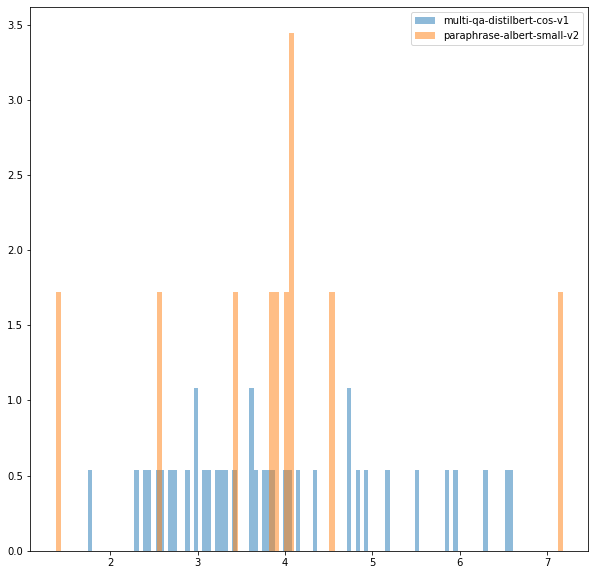

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


for model_name, details in top10_details.items():
  fixed_details = details[details.alpha > 0]
  alpha_mean = fixed_details.alpha.mean()
  alpha_max = fixed_details.alpha.max()
  if  alpha_mean < 4.0 and alpha_max < 8.0 :
    print(model_name, alpha_mean)
    plt.hist(fixed_details.alpha, bins=100, label=model_name, alpha=0.5, density=True)
    plt.xlabel("WeightWatcher PL alpha metric")
    plt.legend()
    #plt.show()

### Look at over 100 sentence transformers

In [8]:
all_model_names = ["multi-qa-MiniLM-L6-cos-v1",
"all-MiniLM-L6-v2",
"multi-qa-distilbert-cos-v1",
"all-MiniLM-L12-v2",
"all-distilroberta-v1",
"multi-qa-mpnet-base-dot-v1",
"all-mpnet-base-v2",
"paraphrase-MiniLM-L3-v2",
"paraphrase-albert-small-v2",
"sentence-t5-base",
"distiluse-base-multilingual-cased",
"distilroberta-base-msmarco-v1",
"nli-bert-large-cls-pooling",
"xlm-r-base-en-ko-nli-ststb",
"bert-large-nli-cls-token",
"nli-distilbert-base-max-pooling",
"nli-bert-large-max-pooling",
"xlm-r-bert-base-nli-mean-tokens",
"msmarco-roberta-base-v2",
"distilbert-base-nli-max-tokens",
"xlm-r-100langs-bert-base-nli-mean-tokens",
"msmarco-MiniLM-L-12-v3",
"msmarco-MiniLM-L12-cos-v5",
"nli-distilbert-base",
"xlm-r-large-en-ko-nli-ststb",
"quora-distilbert-base",
"facebook-dpr-question_encoder-single-nq-base",
"facebook-dpr-question_encoder-multiset-base",
"nli-bert-base",
"bert-large-nli-max-tokens",
"msmarco-roberta-base-ance-firstp",
"bert-base-nli-cls-token",
"stsb-bert-large",
"facebook-dpr-ctx_encoder-multiset-base",
"bert-large-nli-stsb-mean-tokens",
"multi-qa-MiniLM-L6-dot-v1",
"msmarco-distilbert-multilingual-en-de-v2-tmp-trained-scratch",
"nli-roberta-base-v2",
"nli-roberta-base",
"stsb-distilroberta-base-v2",
"bert-base-wikipedia-sections-mean-tokens",
"stsb-bert-base",
"paraphrase-albert-base-v2",
"msmarco-distilbert-base-dot-prod-v3",
"msmarco-distilbert-multilingual-en-de-v2-tmp-lng-aligned",
"bert-large-nli-mean-tokens",
"xlm-r-distilroberta-base-paraphrase-v1",
"msmarco-roberta-base-v3",
"bert-base-nli-max-tokens",
"distilbert-base-nli-stsb-quora-ranking",
"msmarco-MiniLM-L6-cos-v5",
"msmarco-distilroberta-base-v2",
"nli-distilroberta-base-v2",
"roberta-base-nli-mean-tokens",
"distilroberta-base-paraphrase-v1",
"msmarco-MiniLM-L-6-v3",
"distilroberta-base-msmarco-v2",
"nq-distilbert-base-v1",
"msmarco-distilbert-cos-v5",
"msmarco-distilbert-base-v2",
"msmarco-distilbert-base-v3",
"stsb-xlm-r-multilingual",
"msmarco-distilbert-base-tas-b",
"allenai-specter",
"roberta-large-nli-stsb-mean-tokens",
"roberta-base-nli-stsb-mean-tokens",
"use-cmlm-multilingual",
"xlm-r-100langs-bert-base-nli-stsb-mean-tokens",
"stsb-roberta-base",
"msmarco-bert-base-dot-v5",
"quora-distilbert-multilingual",
"stsb-roberta-large",
"xlm-r-bert-base-nli-stsb-mean-tokens",
"paraphrase-MiniLM-L12-v2",
"clip-ViT-B-32-multilingual-v1",
"msmarco-distilbert-dot-v5",
"nli-mpnet-base-v2",
"paraphrase-TinyBERT-L6-v2",
"distiluse-base-multilingual-cased-v1",
"distilbert-base-nli-stsb-mean-tokens",
"stsb-roberta-base-v2",
"paraphrase-distilroberta-base-v1",
"bert-base-nli-stsb-mean-tokens",
"LaBSE",
"stsb-distilbert-base",
"paraphrase-distilroberta-base-v2",
"paraphrase-multilingual-mpnet-base-v2",
"distilbert-base-nli-mean-tokens",
"distilbert-multilingual-nli-stsb-quora-ranking",
"msmarco-distilbert-base-v4",
"paraphrase-xlm-r-multilingual-v1",
"distiluse-base-multilingual-cased-v2",
"paraphrase-mpnet-base-v2",
"paraphrase-multilingual-MiniLM-L12-v2",
"paraphrase-MiniLM-L6-v2",
"bert-base-nli-mean-tokens",
"clip-ViT-B-16",
"clip-ViT-L-14",
"clip-ViT-B-32",
"sentence-t5-xxl",
"sentence-t5-xl",
"sentence-t5-large",
"gtr-t5-large",
"gtr-t5-xl",
"gtr-t5-base",
"gtr-t5-xxl",
"msmarco-bert-co-condensor",
"all-roberta-large-v1",
"all-mpnet-base-v1",
"all-MiniLM-L12-v1",
"all-MiniLM-L6-v1",
"multi-qa-mpnet-base-cos-v1",
"multi-qa-distilbert-dot-v1",
"stsb-mpnet-base-v2",
"roberta-large-nli-mean-tokens",
"nli-roberta-large",
"nli-bert-large",
"nli-bert-base-max-pooling",
"nli-bert-base-cls-pooling",
"facebook-dpr-ctx_encoder-single-nq-base",
"average_word_embeddings_levy_dependency",
"average_word_embeddings_komninos",
"average_word_embeddings_glove.840B.300d",
"average_word_embeddings_glove.6B.300d"]

In [ ]:
%%capture
import warnings
warnings.filterwarnings('ignore')

all_details = {}
for model_name in all_model_names:
    print(model_name)

    model = SentenceTransformer(model_name)
    watcher = ww.WeightWatcher(model=model)
    details = watcher.analyze()
    all_details[model_name] = details


### Compute mean alphas

- do not include alpha < 0



In [ ]:
mean_alphas = []

for model_name, details in sll_details.items():
  fixed_details = details[details.alpha > 0]
  alpha_mean = fixed_details.alpha.mean()
  mean_alphas.append(alpha_mean)  

plt.hist(mean_alphas, bins=100)

### Identify models that pass basic quality check
 
 - mean alpha < 4
 - no alpha outliers > 8

In [ ]:

for model_name, details in all_details.items():
  fixed_details = details[details.alpha > 0]
  alpha_mean = fixed_details.alpha.mean()
  alpha_max = fixed_details.alpha.max()
  if  alpha_mean < 4.0 and alpha_max < 8.0 :
    print(model_name, alpha_mean)

In [ ]:
while True;
  pass